# Panda 2D- DataFrame Part 3

### Built In Functions for dataFrame

* **Dataframe.applymap()**

Applies function to each element of Dataframe and return new dataframe

Examples :

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
print(df)
print('***')
def add_one(x):
    return x + 1
print('Result after applymap()')
df.applymap(add_one)

   a   b   c
0  1  10   5
1  2  20  10
2  3  30  15
***
Result after applymap()


,a,b,c
0,2,11,6
1,3,21,11
2,4,31,16


In [3]:
df + 1 

,a,b,c
0,2,11,6
1,3,21,11
2,4,31,16


***
Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F

In [6]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
print(grades_df)

         exam1  exam2
Andre       43     24
Barry       81     63
Chris       78     56
Dan         75     56
Emilio      89     67
Fred        70     51
Greta       91     79
Humbert     65     46
Ivan        98     72
James       87     60


In [7]:
def convert_grades(grade):
    if grade >= 90:
        return 'A'
    elif grade >=80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    elif grade >= 0:
        return 'F'

In [8]:
grades_df.applymap(convert_grades)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


***
### DataFrame.apply()

This functions different than Series.apply()

Apply function to each element.<br>
In Df.Apply(), each element = each column of Dataframe i.e. panda series <br>
Apply() return new panda series which is new column of Data frame<br>

Also takes axis argument .apply(axis = 0)

In [15]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
print(grades_df)

         exam1  exam2
Andre       43     24
Barry       81     63
Chris       78     56
Dan         75     56
Emilio      89     67
Fred        70     51
Greta       91     79
Humbert     65     46
Ivan        98     72
James       87     60


**.qcut()**
Pandas has a bult-in function that will perform this calculation
- This will give the bottom 0% to 10% of students the grade 'F',
- 10% to 20% the grade 'D', and so on. 
- You can read more about the qcut() function here:<br>
- qcut() operates on a list, array, or Series
- Returns the result of running the function on a single column of dataframe
- qcut() does not work on Dataframe, but we can use apply() to call this function on each column separately
 http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html

In [17]:
def convert_grades_curve(exam_grades):
    return pd.qcut(exam_grades,[0, 0.1, 0.2, 0.5, 0.8, 1],labels=['F', 'D', 'C', 'B', 'A'])
convert_grades_curve(grades_df['exam1'])

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [23]:
convert_grades_curve(grades_df['exam2'])

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam2, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [22]:
grades_df.apply(convert_grades_curve)

,exam1,exam2
Andre,F,F
Barry,B,B
Chris,C,C
Dan,C,C
Emilio,B,B
Fred,C,C
Greta,A,A
Humbert,D,D
Ivan,A,A
James,B,B


Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.

In [18]:
def standarize_column(column):
    return (column - column.mean())/column.std(ddof = 0)

In [20]:
standarize_column(grades_df['exam1'])

Andre     -2.315341
Barry      0.220191
Chris      0.020017
Dan       -0.180156
Emilio     0.753987
Fred      -0.513779
Greta      0.887436
Humbert   -0.847401
Ivan       1.354508
James      0.620538
Name: exam1, dtype: float64

In [21]:
grades_df.apply(standarize_column)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


#### apply()
##### Use case 2
Instead of taking column and return new column , function takes column and return a single value. End result is new Series instead of new DataFrame

In [28]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})
print(df)

   a   b   c
0  4  20  25
1  5  10  20
2  3  40   5
3  1  50  15
4  2  30  10


In [33]:
print(df.mean())
print(df.mean(axis = 0))
print(df.apply(np.mean))
print(df.apply(np.max))

a     3.0
b    30.0
c    15.0
dtype: float64
a     3.0
b    30.0
c    15.0
dtype: float64
a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


Find the second largest in each column

In [35]:
df['a'].sort_values(ascending = False)

1    5
0    4
2    3
4    2
3    1
Name: a, dtype: int64

In [34]:
def find_second_largest(column):
    return column.sort_values(ascending = False).iloc[1]

In [36]:
df.apply(find_second_largest)

a     4
b    40
c    20
dtype: int64

# pandas groupby()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [5]:
print(values)
print(example_df)

[1 3 2 4 1 6 4]
   value   even  above_three
a      1  False        False
b      3  False        False
c      2   True        False
d      4   True         True
e      1  False        False
f      6   True         True
g      4   True         True


In [6]:
example_df.groupby('even')

In [11]:
example_df.groupby('even').groups

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}

Get sum of each group

In [12]:
example_df.groupby('even').sum()

,value,above_three
even,,
False,5,0
True,16,3


In [16]:
grouped_data = example_df.groupby('even')

In [19]:
grouped_data.groups

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}

In [20]:
grouped_data.sum()

,value,above_three
even,,
False,5,0
True,16,3


In [39]:
grouped_data['value'].mean()

even
False    1.666667
True     4.000000
Name: value, dtype: float64

Group by multiple columns

In [17]:
example_df.groupby(['even','above_three']).groups

{(False, False): ['a', 'b', 'e'], (True, False): ['c'], (True, True): ['d', 'f', 'g']}

In [32]:
engagement_df = pd.DataFrame({
    'account_key':['1200','1200','1200','1200',
                  '1200','1200','1175','1175','1175',
                  '1175','1175','1175','1175'
                  ],
    'utc-date':['2015-03-04','2015-03-04','2015-03-04','2015-03-04',
               '2015-03-04','2015-03-04','2015-03-04','2015-03-04',
               '2015-03-04','2015-03-04','2015-03-04','2015-03-04',
               '2015-03-04'],
    'total_minutes_visited':[114.9,43.4,187.8,150.1 , 191.6,
                            0,8.8,2.7,0,0,0,0,0]
})
engagement_df

,account_key,utc-date,total_minutes_visited
0,1200,2015-03-04,114.9
1,1200,2015-03-04,43.4
2,1200,2015-03-04,187.8
3,1200,2015-03-04,150.1
4,1200,2015-03-04,191.6
5,1200,2015-03-04,0.0
6,1175,2015-03-04,8.8
7,1175,2015-03-04,2.7
8,1175,2015-03-04,0.0
9,1175,2015-03-04,0.0


In [33]:
engagement_df.groupby('account_key')

In [34]:
engagement_df.groupby('account_key').groups

{'1175': [6, 7, 8, 9, 10, 11, 12], '1200': [0, 1, 2, 3, 4, 5]}

In [35]:
engagement_df.groupby('account_key').sum()

,total_minutes_visited
account_key,
1175,11.5
1200,687.8


In [36]:
engagement_df.groupby('account_key').sum()['total_minutes_visited']

account_key
1175     11.5
1200    687.8
Name: total_minutes_visited, dtype: float64

In [38]:
engagement_df.groupby('account_key').sum()['total_minutes_visited'].mean()

349.65000000000003

More Examples

Finding Subway ridership by day of week

In [40]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [42]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [56]:
subway_df.groupby('day_week').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [58]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

In [59]:
ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='day_week'>

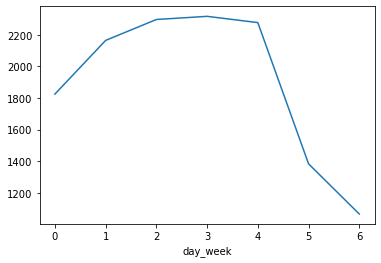

In [60]:
%pylab inline
import seaborn as sns
ridership_by_day.plot()

Calculating Hurly Entries and Exits

In [61]:
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [63]:
example_df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


###### Standarize each group

In [67]:
def standarize(xs):
    return(xs - xs.mean())/xs.std()

In [72]:
example_df.groupby('even')

In [73]:
example_df.groupby('even')['value'].apply(standarize)

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64

Find Second largest value in each group

In [92]:
def second_largest(xs):
    sorted_xs = xs.sort_values(inplace = False , ascending = False)
    return sorted_xs.iloc[1]

In [93]:
example_df['value']

a    1
b    3
c    2
d    4
e    1
f    6
g    4
Name: value, dtype: int32

In [95]:
example_df.groupby('even')['value'].apply(second_largest)

even
False    1
True     4
Name: value, dtype: int64

Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem

In [96]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})


In [97]:
ridership_df

,UNIT,TIMEn,ENTRIESn,EXITSn
0,R051,00:00:00,3144312,1088151
1,R079,02:00:00,8936644,13755385
2,R051,04:00:00,3144335,1088159
3,R079,06:00:00,8936658,13755393
4,R051,08:00:00,3144353,1088177
5,R079,10:00:00,8936687,13755598
6,R051,12:00:00,3144424,1088231
7,R079,14:00:00,8936819,13756191
8,R051,16:00:00,3144594,1088275


In [98]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [101]:
ridership_df.groupby('UNIT')['ENTRIESn','EXITSn'].apply(hourly_for_group)

<ipython-input-101-f4aa4416a1df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ridership_df.groupby('UNIT')['ENTRIESn','EXITSn'].apply(hourly_for_group)


,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0
